In [48]:


import os
import numpy as np
import pandas as pd

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [50]:
def load_data_from_csv_files(base_path):
    """
    Loads documents and labels from specific CSV files within the base directory.
    Assumes the files are named 'politics.csv', 'business.csv', and 'health.csv'.
    """
    documents = []
    labels = []
    
    # Define a mapping from filename to category
    category_map = {
        'politics.csv': 'politics',
        'business.csv': 'business',
        'health.csv': 'health'
    }

    # Iterate through the files in the base path
    for filename in os.listdir(base_path):
        if filename.endswith('.csv') and filename in category_map:
            file_path = os.path.join(base_path, filename)
            category = category_map[filename]
            
            try:
                # Read the CSV file
                df = pd.read_csv(file_path, encoding='utf-8')
                
                # Check for the 'Headline' column
                if 'Headline' in df.columns:
                    for headline in df['Headline'].fillna('').tolist():
                        documents.append(headline)
                        labels.append(category)
                    print(f"Loaded {len(df)} documents from {filename} ({category} category).")
                else:
                    print(f"Skipping {filename}: 'Headline' column not found.")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    print(f"\nTotal documents loaded: {len(documents)}")
    return documents, labels


In [51]:
# Set the correct base path
data_path = '../data1/'
X, y = load_data_from_csv_files(data_path)

# You can now proceed with the rest of your original code
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# ... etc.


Loaded 255 documents from politics.csv (politics category).
Loaded 255 documents from business.csv (business category).
Loaded 202 documents from health.csv (health category).

Total documents loaded: 712


In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [53]:
# --- Step 2: Create a Classification Pipeline ---
# A Pipeline combines a feature extractor (TF-IDF) and a classifier into a single object.
# This makes it easy to train and use the model.

# Choose a classifier: Logistic Regression is a solid choice.
# Naive Bayes is also excellent, especially for text data.
# You can easily swap them here to compare performance.
# classifier = MultinomialNB()
classifier = LogisticRegression(random_state=42)

In [54]:
# TfidfVectorizer converts text into a numerical representation.
# It assigns weights to words based on their frequency in a document and the entire corpus.
# We'll also remove common English "stop words" like 'the', 'is', 'a', etc.,
# as they generally don't help with classification.
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', classifier)
])

In [55]:
# --- Step 3: Train the Model ---
print("Training the model...")
pipeline.fit(X_train, y_train)
print("Training complete.")

Training the model...
Training complete.


In [56]:
# --- Step 4: Evaluate the Model (for your viva and report) ---
print("\nEvaluating model performance...")
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


Evaluating model performance...
              precision    recall  f1-score   support

    business       0.66      0.86      0.74        56
      health       0.68      0.56      0.61        48
    politics       0.89      0.78      0.83        74

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.76      0.75      0.75       178



In [57]:
# --- Step 5: Classify a New Document ---
def classify_document(model, document_text):
    """
    Predicts the category of a new document.
    """
    predicted_category = model.predict([document_text])
    return predicted_category[0]

In [68]:
# Example inputs to demonstrate robustness
test_documents = [
    # Short input, without stop words
    "i am pari", 
    # Long input, with stop words's speech 
    "The new regulations will have a significant impact on global markets, with economists predicting a period of both challenges and opportunities for investors and large corporations.",
    # Different topic
    "Researchers have developed a breakthrough treatment for a rare disease, which could save countless lives across the world.",
    # Challenging input (mix of topics)
    "The prime minister announced a new public health initiative aimed at reducing obesity, with funding from a tax on sugary drinks to be implemented by the Treasury.",
    # Another challenging input
    "A new study on the stock market shows that while tech stocks are booming, there is a looming economic recession that could affect public welfare."
]



In [69]:
print("\n--- Testing new documents ---")
for doc in test_documents:
    predicted_class = classify_document(pipeline, doc)
    print(f"Document: '{doc}'")
    print(f"Predicted Category: {predicted_class}\n")


--- Testing new documents ---
Document: 'i am pari'
Predicted Category: business

Document: 'The new regulations will have a significant impact on global markets, with economists predicting a period of both challenges and opportunities for investors and large corporations.'
Predicted Category: business

Document: 'Researchers have developed a breakthrough treatment for a rare disease, which could save countless lives across the world.'
Predicted Category: health

Document: 'The prime minister announced a new public health initiative aimed at reducing obesity, with funding from a tax on sugary drinks to be implemented by the Treasury.'
Predicted Category: health

Document: 'A new study on the stock market shows that while tech stocks are booming, there is a looming economic recession that could affect public welfare.'
Predicted Category: business



Matplotlib is building the font cache; this may take a moment.



Creating Confusion Matrix Plot...
Confusion Matrix plot saved as confusion_matrix.png


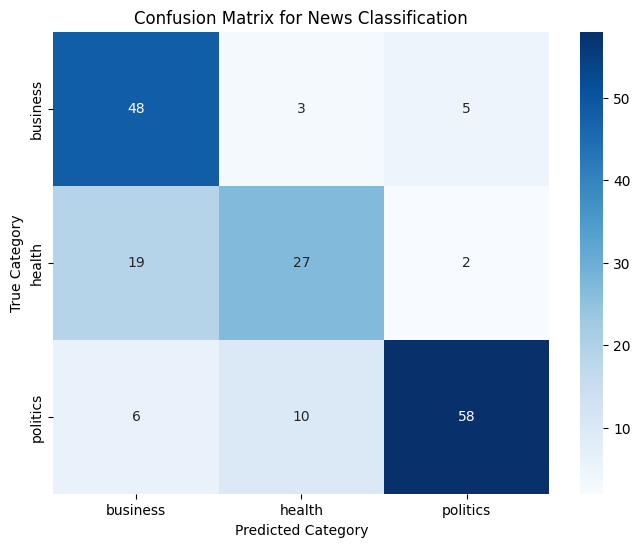


Creating Bar Chart of Performance Metrics...
Performance Metrics Bar Chart plot saved as performance_metrics_bar_chart.png


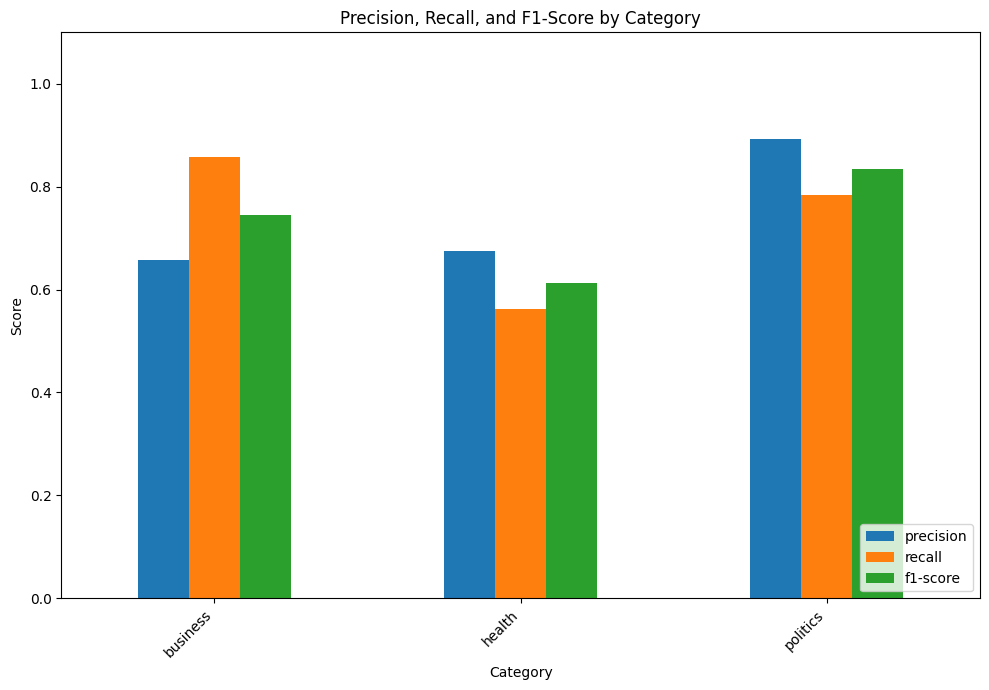

In [70]:
# Import necessary libraries for visualization and metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Get the unique class labels for the plot axes
classes = sorted(np.unique(y_test))

# --- Create and Plot the Confusion Matrix ---
print("\nCreating Confusion Matrix Plot...")
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for News Classification')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.savefig('confusion_matrix.png')
print("Confusion Matrix plot saved as confusion_matrix.png")
plt.show()

# --- Parse Classification Report and Create Bar Chart ---
print("\nCreating Bar Chart of Performance Metrics...")
report = classification_report(y_test, y_pred, output_dict=True)

# Remove 'accuracy' and 'macro avg' from the report dictionary for plotting
del report['accuracy']
del report['macro avg']
del report['weighted avg']

metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df[['precision', 'recall', 'f1-score']]

metrics_df.plot(kind='bar', figsize=(10, 7))
plt.title('Precision, Recall, and F1-Score by Category')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('performance_metrics_bar_chart.png')
print("Performance Metrics Bar Chart plot saved as performance_metrics_bar_chart.png")
plt.show()